# **Video Virtual Try-On**
## Maygan Miguez (*TU '22*) and Jaclyn Wilson (*TU '22*)

Video Virtual Try-On is our senior year final capstone project. This project implements a virtual try-on solution that takes in a user's video input, runs the ACGPN model on the extracted video frames, and outputs a virtual try-on video that mimics a real-time virtual clothing try-on. 

        
**ACGPN Cited:**

Yang_2020_CVPR   
Yang, Han and Zhang, Ruimao and Guo, Xiaobao and Liu, Wei and Zuo, Wangmeng and Luo, Ping, *Towards Photo-Realistic Virtual Try-On by Adaptively Generating-Preserving Image Content*, IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), June 2020.

# Project Goal       
Our project aims to add a video component to the virtual try-on image-to-image method. This software allows the user to preview an article of clothing on their body using a video component to mimic how the garment would look in real-time. 

Our approach to virtual try-on enables the user to virtually view the garment on their body instead of their picture, so they can have a closer experience to actually trying on clothes in a brick-and-mortar store. This solution improves the current work done using the Adaptive Content Generating and Preserving Network (ACGPN). The ACGPN has never been adapted to work with video input. 
 


# The ACGPN
The ACGPN has three primary modules, including a semantic generation module (SGM), clothes warping module (CWM), and a content fusion module (CFM). The SGM uses semantic segmentation of the reference image to create the desired semantic layout after try-on. Next, the CWM warps the clothing images according to the generated semantic layout, and a second-order difference constraint is used in the warping process during training. Third, the CFM integrates all of the information, including the reference image, semantic layout, and warped clothes, to produce each semantic part of the body

# Our Approach
This virtual try-on problem can be broken down into two parts: 
* Taking in a video input of the person trying on model clothing
* Running the ACGPN model on the video input to mimic a real-time virtual clothing try-on experience in a reasonable amount of time. 

Our approach takes in video input from the user and outputs a video of the user wearing the target clothing. Because the ACGPN model runs on single images, we must break down the video input into frames and run the model on each frame of the video. After running the model on the video frames, we compile the new try-on images back into a new video as output.
           


# Conclusion
Overall, our project had some unexpected turns throughout the year which enabled us to learn more about the virtual clothing try-on problem and the potential solutions that could be implemented to solve it. Given the time constraint of two semesters, we were able to research more about deep learning techniques and determine a realistic solution that we could implement to address the problem. However, a lot improvements we would like to make to the video virtual try-on would take a lot more time and research than we had this year. Therefore, if we had more time and resources there are a few improvements we would implement and continue to work on.
         
Regarding the model, we would work on improving the run time and the model in general. Because it takes a substantial amount of time to run the model frame by frame, we would look into developing a parallel computing solution that could decrease the program’s runtime. Moreover, we would utilize 3-dimensional instead of 2-dimensional key points, so we could improve on the skin preservation component to recognize when body parts are not being displayed and deformed. We also would require a face detection implementation to help identify different angles given a 360-degree input. The model currently does not function well with hair in the way and various obstructions. 


### Our Video Virtual Try-On solution can be viewed below.

# **I. Webcam & Model Set Up**

## Install Dependencies

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#have to install numpy version 1.16.2 in order to run the program
#after installing, restart the run time
!pip install numpy==1.16.2

## Webcam Video Set Up
Running code on webcam video is a little more complex than images. Here we use [Offer Sadey's method to implement a webcam with google Colab](https://gitlab.com/osadey/face-detection/-/blob/master/Face_Detection.ipynb). We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.


In [ ]:
# Make a temporarty directory in Google colab
!mkdir -p /content/sample_data/frames > /dev/null
!mkdir -p /content/sample_data/videos > /dev/null

In [ ]:
video_file_train = '/content/sample_data/videos/video_train.mp4' 

VIDEO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var my_btn_txt = document.createTextNode("Press to start recording");

my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, videoStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  videoStream = stream;
  var options = {  
    mimeType : 'video/webm;codecs=vp9'  
  };            
  recorder = new MediaRecorder(stream, options);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('video');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({video: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      videoStream.getVideoTracks()[0].stop();
      recordButton.innerText = "Saving the recording... Please wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def start_webcam():
  js = Javascript('''
    async function startWebcam() {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      return;

    }
    ''')
  
  display(js)
  data = eval_js('startWebcam()')
  
    
start_webcam()

def get_video():
  display(HTML(VIDEO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  return binary

videofile = get_video()

with open(video_file_train, 'wb') as f:
  f.write(videofile)

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [ ]:
INPUT_VIDEOS_PATH = '/content/sample_data/videos'              # Path to folder with videos 
OUTPUT_FRAMES_PATH = '/content/sample_data/frames'      # Location of extracted images

frame_name = 'frame'                                                  # Frame name       
one_frame_each = 4                                                    # Extract one frame each 70


!if [ -d {OUTPUT_FRAMES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FRAMES_PATH} ; else mkdir {OUTPUT_FRAMES_PATH} && echo "Output directory created"; fi

files = !ls {INPUT_VIDEOS_PATH}/*.mp4                                 # Video file names in INPUT VIDEOS PATH
videofile = files[0]                                                  # Refactor of variable 'files' to convert the first video of list 

count = 0
success = True

vidcap = cv2.VideoCapture(videofile)

while success:
    if (count%one_frame_each == 0):                                   # checks frame number and keeps one_frame_each          
        success,image = vidcap.read()                                 # reads next frame           
        tmp = resize(image, (math.floor(640 / image.shape[1] * image.shape[0]), 640), mode='constant')

        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pixels = np.array(img)

        plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH,frame_name, count), img) # saves images to frame folder
        print ('*', end="")
    else:
        success,image = vidcap.read()                                 # reads next frame
    count += 1                                                        # loops counter

## Adaptive Content Generating and Preserving Network (ACGPN) Set Up

We set up the ACGPN for use on our video images by first cloning the ACGPN repository and installing the proper dependencies.

In [ ]:
# !git clone https://github.com/levindabhi/ACGPN.git
%cd /content/drive/MyDrive/ACGPN

!pip install ninja

/content/drive/MyDrive/ACGPN


In [ ]:
!python --version

Python 3.7.13


In [ ]:
import numpy as np
from PIL import Image
import IPython
import os
import sys
import time

from predict_pose import generate_pose_keypoints

In [ ]:
#check to make sure that numpy version is 1.16.2
np.__version__

'1.16.2'

In [ ]:
## import u2net_run python script
%cd /content/drive/MyDrive/ACGPN/U-2-Net
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')


/content/drive/MyDrive/ACGPN/U-2-Net
...load U2NEP---4.7 MB


In [ ]:
## check target cloth folder
%cd /content/drive/MyDrive/ACGPN
sorted(os.listdir('inputs/cloth'))[0]

/content/drive/MyDrive/ACGPN


'002494_1.jpg'

In [ ]:
## always name the target cloth image to cloth_name##
def switch_refer_cloth(i):
  if i<len(os.listdir('inputs/cloth')):
    cloth_name = '000001_1.png'
    cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[i])## index 0 means the first image
    cloth = Image.open(cloth_path)

    ## in other word, every target cloth is saved to "Data_preprocessing/test_color" by resizing to 192x256
    cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')

    cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

    # Generating mask for: 000001_1.png
    u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

# **II. Input Try-On Video**
The user must input a video of their full body wearing dark clothes in front of a plain white background with minimal shadows or using flash. This input results in the most accurate try-on output. We determined that the maximum video length is 10 seconds as this length of video does not result in an unreasonably long runtime. We recognize that these requirements for the input video limit the use and availability of people to use our solution. Thus, future improvements should include improving the model’s accuracy on other backgrounds, clothing colors, and longer video length.

## Input Video

Upload the input video and grab frame by frame and save to a folder.

Install dependencies

In [ ]:
#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

Installation finished.


Here we have the option upload the video file from an external folder or from the recorded video folder. 

In [ ]:
import os, sys, re

media_file_path = "/content/drive/MyDrive/videos/IMG_7620.MOV" #@param {type:"string"}

os.environ['inputFile'] = media_file_path

!ffmpeg -i "$inputFile" -hide_banner

 Next, we grab the frames and set the rate at which the video frames will be selected. The video frame images are then saved in the Extracted Frames folder.   
https://colab.research.google.com/github/yunooooo/FFmpeg-for-Google-Drive/blob/master/FFmpeg.ipynb#scrollTo=tozwpAhhnm69


In [ ]:
#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
#* [*Example*](https://yuju.pw/y/36pP.png) *of output folder*
import os, sys, re

video_file_path = "/content/drive/MyDrive/videos/IMG_7620.MOV" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:00:09.000" #@param {type:"string"}
frame_rate = "20" #@param {type:"string"} the number of frames per second

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png

# **III. Model Preprocessing**

## Preprocess Images
We then run the program on various inputs to test the accuracy of the model by preprocessing images, displaying the 2-D keypoints of the test images, and determining the probability of the keypoint accuracy.

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

First, we preprocess the test image pair containing the test try-on clothing item and model images and run a test virtual try-on on them.

In [ ]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [ ]:
def run_test(img_name, img_path):
  img = Image.open(img_path)
  img = img.resize((192,256), Image.BICUBIC).convert('RGB')

  ## in other word, every target cloth is saved to "Data_preprocessing/test_img" by resizing to 192x256

  img_path = os.path.join('Data_preprocessing/test_img', img_name)
  img.save(img_path)

  print('Image Parsing Generation')

  !python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'

  print('Pose Map Generation')

  pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
  generate_pose_keypoints(img_path, pose_path)

  print('Evalution Starts')
  !python3 test2.py
  print('Image Generation Done!')
  # output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
  #                 np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
  #                 np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
  # image_grid = Image.fromarray(output_grid)
  # return image_grid

## Determine Keypoints
Next, we display the keypoints with the user image and save the average probability of each image.

In [ ]:
def show_keypoints():
  f = open('Data_preprocessing/test_pose/000001_0_keypoints.json')
  data = json.load(f)
  pose = data['people']
  pose = pose[0]
  points = pose['pose_keypoints']
  i = 0
  temp = []
  x = []
  y = []
  prob = []
  while i<54:
    list1 = []
    list1.append(points[i])
    x.append(points[i])

    list1.append(points[i+1])
    y.append(points[i+1])

    list1.append(points[i+2])
    if points[i+2]!= 0:
      prob.append(points[i+2])

    temp.append(list1)
    #temp.append('('+str(points[i]) +',' +str(points[i+1]) + ',' + str(points[i+2])+')')
    i = i + 3
  
  prob_sum = sum(prob)
  prob_total = prob_sum/len(prob)
  print("probability of points " + str(prob_total))

  data = image.imread('Data_preprocessing/test_img/000001_0.png')

  plt.scatter(x, y)
  #plt.xlim([0, 192])
  #plt.ylim([0, 256])
  plt.imshow(data)
  plt.show()

  return prob_total

Next, we check the input image folder to make sure it contains the proper clothing image files. 

In [ ]:
## check image cloth folder
sorted(os.listdir('inputs/img'))

['Copy of try_on_1.png',
 'Screen Shot 2022-04-07 at 1.32.32 PM.png',
 'Screen Shot 2022-04-09 at 3.26.05 PM.png',
 'Screen Shot 2022-04-09 at 3.35.22 PM (80res).png',
 'Screen Shot 2022-04-09 at 3.35.22 PM.png',
 'Screen Shot 2022-04-10 at 4.52.01 PM.png',
 'Screen Shot 2022-04-10 at 4.54.14 PM.png',
 'Screen Shot 2022-04-10 at 4.54.24 PM.png',
 'Screen Shot 2022-04-10 at 4.54.36 PM.png',
 'Screen Shot 2022-04-10 at 4.54.45 PM.png',
 'Screen Shot 2022-04-10 at 4.54.56 PM.png',
 'Screen Shot 2022-04-10 at 4.55.06 PM.png',
 'Screen Shot 2022-04-10 at 4.55.16 PM.png',
 'Screen Shot 2022-04-10 at 4.55.33 PM.png',
 'Screen Shot 2022-04-10 at 4.55.41 PM.png',
 'Screen Shot 2022-04-10 at 4.55.53 PM.png',
 'frame0002.png',
 'img2.png',
 'img3.png',
 'img4.png',
 'try_on_1.png',
 'try_on_4.png',
 'try_on_5.png',
 'try_on_6.png']

In [ ]:
os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[2])

'inputs/img/Screen Shot 2022-04-09 at 3.26.05 PM.png'

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png
Image Parsing Generation
100% 1/1 [00:00<00:00,  5.45it/s]
Pose Map Generation
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Evalution Starts
?
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/test_edge edge
Data_preprocessing/test_edge edge
Data_preprocessing/test_mask mask
Data_preprocessing/test_mask mask
Data_preprocessing/test_colormask colormask
Data_preprocessing/test_colormask colormask
Data_preprocessing/test_color color
Data_preprocessing/test_color color
latest_net_U.pth
latest_net_G1.pth
latest_net_G2.pth
latest_net_G.pth
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/usr/local/lib/python3.7/dist-packages/to

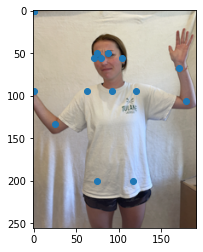

In [ ]:
img_name = '000001_0.png' #  name the image cloth image to img_name
switch_refer_cloth(0)

img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[2])
run_test(img_name, img_path)
x = show_keypoints()#returns a photo of the image and its key points and saves the average probability of each photo at x
time.sleep(2)

## Run on Test Image
Here, we run the model on a test image to determine how the try-on garment will look on a single image. Below, we display the original user image, target clothing image, and the final try-on image.

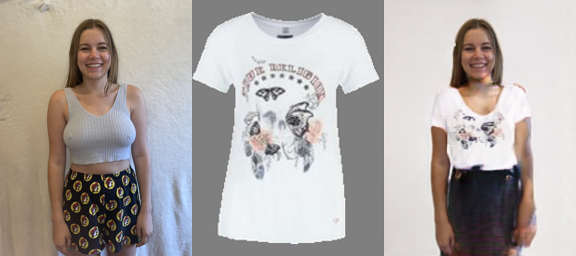

In [ ]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open(os.path.join('results/test/try-on', sorted(os.listdir('results/test/try-on'))[-1])))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

The code below runs through a few different inputs on one clothing item and displays its key points.

In [ ]:
## always name the image cloth image to img_name##

img_name = '000001_0.png'
switch_refer_cloth(0)
probs = []
for i in range(0, 15):#range(len(sorted(os.listdir('inputs/img')))):
  img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[i])
  run_test(img_name, img_path)
  x = show_keypoints()#returns a photo of the image and its key points and saves the average probability of each photo at x
  probs.append(x)
  time.sleep(2)

# **IV. Run ACGPN on the Input Video**
The model runs on the video frames once the user’s video is inputted. Our code first splits the input video into frame images. We determined that 20 frames are the ideal number to capture from each second of the input video in our solution. These frame images are then preprocessed and resized to prepare for the model. Additionally, a test function runs to ensure that the model can map a garment to a preprocessed video frame image. Once the model passes the test with the video frames, our code loads the images into the ACGPN model, which maps the try-on garment to the user in each video frame separately. 


We first check that the video frames were extracted and saved to the Extracted Frames folder.

In [ ]:
## check image cloth folder
sorted(os.listdir('/content/drive/MyDrive/videos/Extracted_Frames'))

## Run ACGPN on Video Frames
Here, we input the extracted video frames into the ACGPN model. We also display the key points from the video frames to determine the accuracy of the model on the input video.

In [ ]:
img_name = '000001_0.png'
switch_refer_cloth(0)
probs = []
for i in range(len(sorted(os.listdir('/content/drive/MyDrive/videos/Extracted_Frames')))):#range(len(sorted(os.listdir('inputs/img')))):
  img_path = os.path.join('/content/drive/MyDrive/videos/Extracted_Frames', sorted(os.listdir('/content/drive/MyDrive/videos/Extracted_Frames'))[i])
  run_test(img_name, img_path)
  x = show_keypoints() #returns a photo of the image and its key points and saves the average probability of each photo at x
  probs.append(x)
  time.sleep(2)

## Determine Model Accuracy on Inputted Video
Next, we plot the Distribution of probabilities of keypoint accuracy to determine the likelihood that the try-on will accurately depict the clothing item.

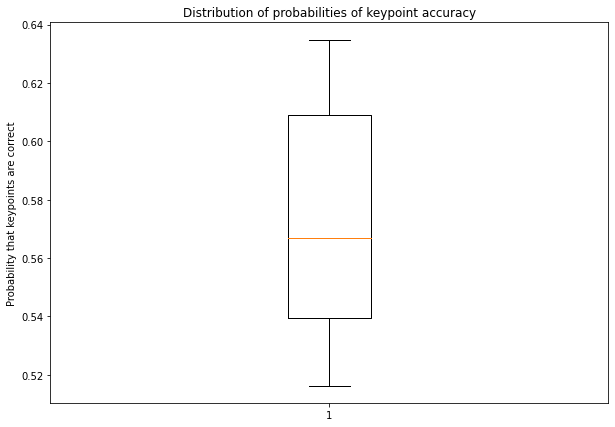

In [ ]:
plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(probs)

plt.title('Distribution of probabilities of keypoint accuracy')
#plt.set_xlabel('xlabel')
plt.ylabel('Probability that keypoints are correct')
 
# show plot
plt.show()

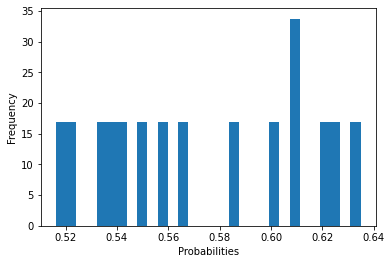

In [ ]:
plt.hist(probs, density=True, bins=30)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Probabilities');

# **V. Convert Frames Into Output Try-On Video**

Next, we take the outputted try-on frames from the ACGPN and combine to create a new video to mimic the user "trying on" the target clothing item in real-time.

In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/videos/Extracted_Frames', sorted(os.listdir('/content/drive/MyDrive/videos/Extracted_Frames'))[14]))

In [ ]:
height, width, layers = img.shape

## Combine Try-On Frames to Create Video
This function converts the try-on frames back into an .mp4 video.

In [ ]:
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    #files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    #for sorting the file names properly
    #files.sort(key = lambda x: int(x[5:-4]))
    for i in range(len(sorted(os.listdir(pathIn)))):
        filename=os.path.join(pathIn, sorted(os.listdir(pathIn))[i])
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()


We save the final try-on video as an .mp4 file in the video folder. 

In [ ]:
pathIn= '/content/drive/MyDrive/ACGPN/results/test/try-on'
pathOut = '/content/drive/MyDrive/videos/video.mp4'
fps = 10.0
convert_frames_to_video(pathIn, pathOut, fps)

# **VI. Output Final Try-On Video**
After the model runs on the video frames and outputs try-on images, a video of compiled try-on images is outputted to mimic the view of a real-time try-on. This video displays how the target garment would look on the user’s body in real time. Because we only capture 25 frames per second, the output try-on video is slightly shorter than the inputted video. While this discrepancy results in a shorter try-on video, it enables us to preserve the quality of the try-on results. In order to increase the number of frames that can be captured and then input into the model, one must improve the time efficiency of the model. To improve the time efficiency of our approach, we simplified redundant code in the ACGPN model. In the future, one should work to improve this time efficiency further. 

Below, we display the outputted try-on video.

In [ ]:
from moviepy.editor import *

path="/content/drive/MyDrive/videos/video.mp4" 

clip=VideoFileClip(path)
clip.ipython_display(width=280)

 99%|█████████▉| 130/131 [00:00<00:00, 893.60it/s]


# **VII. Reset Model for Future Use**

## Delete All Images
We clear the folders and images after outputting the final try-on video for future use.

In [ ]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*
!rm -rf results/*